In [2]:
import requests
import pandas as pd
import os
from konlpy.tag import Mecab
import warnings
warnings.filterwarnings('ignore')

In [3]:
csv_path = os.getenv("HOME") + "/aiffel/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [4]:
df.tail()

,news,code
5119,신종 코로나바이러스 감염증(코로나19) 사태 이후 ‘가정의 달’ 5월에도 언택트(비...,IT/과학
5120,는 소비자로부터 월 이용료 1만~2만원을 받고 초고속 인터넷을 제공한다. 그런 SK...,IT/과학
5121,머리를 긁고 있는 오랑우탄. 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이...,IT/과학
5122,가 오는 15일 정식 출시하는 스마트폰 'LG벨벳'이 사실상 '공짜폰'이 될 전망이...,IT/과학
5123,이미지제공=게티이미지뱅크 이미지제공=게티이미지뱅크\n\n[Copyright ⓒ 전자...,IT/과학


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5124 entries, 0 to 5123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    5124 non-null   object
 1   code    5124 non-null   object
dtypes: object(2)
memory usage: 80.2+ KB


In [6]:
df['news'].head()

0    파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...
1    동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...
2    황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...
3    귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...
4    (서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...
Name: news, dtype: object

In [7]:
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news'].head()

0    파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1    동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2    황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3    귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4    서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
Name: news, dtype: object

In [8]:
df.isnull().sum()

news    0
code    0
dtype: int64

In [9]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [10]:
#중복된 샘플을 제거하기 
df.drop_duplicates(subset=['news'], inplace=True)

#데이터 탐색하기 
#df['code'].value_counts().plot(kind = 'bar')

In [11]:
#뉴스기사 실제 개수를 확인하기 
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학    903
1     사회   1668
2  생활/문화   1423


In [12]:
#tokenization 자연어처리에서 특정단위를 토큰이라고 하고 전처리과정을 형태소분석기를
#해야한다/// 토큰화라는건 자연어를 토큰단위로 자르는 것 
tokenizer = Mecab() #mecab()을 사용한다. 
tokenizer

In [13]:
# https://wikidocs.net/21698 이 링크 참고하면 좋을듯 
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']
def preprocessing(data): # 불용어는 한번만 하는게 아니라 토큰화과정을 거쳐서 지속적으로 사용함
    text_data = []
    for sentence in data:
        temp_data = []
        #- 토큰화
        temp_data = tokenizer.morphs(sentence) 
        #- 불용어 제거
        temp_data = [word for word in temp_data if not word in stopwords] 
        text_data.append(temp_data)
    text_data = list(map(' '.join, text_data))
    return text_data

In [14]:
text_data = preprocessing(df['news'])
#text_data

In [15]:
from sklearn.model_selection import train_test_split #트레인 데이터 분류하기 20%
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [16]:
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999


In [17]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
# 왜 기사의 단어의 수를 카운트하며 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [18]:
#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
#단어의 문서 연관성을 수치로 표시 
#https://www.youtube.com/watch?time_continue=21&v=meEchvkdB1U&feature=emb_logo
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.90      0.74      0.81       236
          사회       0.79      0.91      0.85       422
       생활/문화       0.81      0.76      0.79       341

    accuracy                           0.82       999
   macro avg       0.83      0.80      0.81       999
weighted avg       0.82      0.82      0.82       999



## Hyperparameter 수정 + 데이터 증가

In [19]:
!ls

'E_1iris classification.ipynb'	'E_3손글씨 분류하기 .ipynb'
'E_3뉴스크롤링 및 분류.ipynb'	'E_4 내가 개상이니 고양이 상이니.odt'
 E_3뉴스크롤링.ipynb


In [20]:
csv_path2 = os.getenv("HOME") + "/aiffel/news_data2.csv"
df2 = pd.read_table(csv_path2, sep=',')
df2.head()

,news,code
0,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,경제
1,▶제21대 총선 실시간 개표 현황 및 결과 보기\n\n총선에서 여당이 다시 한 번 ...,경제
2,[뉴욕=AP/뉴시스]지난 10일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다....,경제
3,"부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 1200원대, 경유는 1000원...",경제
4,담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다.이전...,경제


In [21]:
df2['news'] = df2['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df2['news'].head()

0    기사 섹션 분류 안내기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다 언론사...
1    제대 총선 실시간 개표 현황 및 결과 보기총선에서 여당이 다시 한 번 승리를 거두면...
2    뉴욕뉴시스지난 일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다 신종 코로나바이...
3    부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 원대 경유는 원대에 돌입했다일 ...
4    담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다이전까...
Name: news, dtype: object

In [22]:
df2.head()

,news,code
0,기사 섹션 분류 안내기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다 언론사...,경제
1,제대 총선 실시간 개표 현황 및 결과 보기총선에서 여당이 다시 한 번 승리를 거두면...,경제
2,뉴욕뉴시스지난 일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다 신종 코로나바이...,경제
3,부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 원대 경유는 원대에 돌입했다일 ...,경제
4,담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다이전까...,경제


In [23]:
df.head()

,news,code
0,파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...,사회
1,동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...,사회
4,서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...,사회


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 0 to 4829
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    3994 non-null   object
 1   code    3994 non-null   object
dtypes: object(2)
memory usage: 93.6+ KB


In [25]:
DF = pd.concat([df, df2])

In [26]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7697 entries, 0 to 3702
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    7697 non-null   object
 1   code    7697 non-null   object
dtypes: object(2)
memory usage: 180.4+ KB


In [27]:
text_data = preprocessing(DF['news'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(text_data, DF['code'], random_state = 0)

print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 5772
테스트용 뉴스 기사의 개수 :  1925
훈련용 레이블의 개수 :  5772
테스트용 레이블의 개수 :  1925


In [29]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
# 왜 기사의 단어의 수를 카운트하며 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
#단어의 문서 연관성을 수치로 표시 
#https://www.youtube.com/watch?time_continue=21&v=meEchvkdB1U&feature=emb_logo
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.82      0.87      0.84       418
          경제       0.89      0.42      0.57       243
          사회       0.80      0.92      0.85       685
       생활/문화       0.81      0.81      0.81       579

    accuracy                           0.81      1925
   macro avg       0.83      0.75      0.77      1925
weighted avg       0.82      0.81      0.80      1925



```
   IT/과학       0.90      0.74      0.81       236
   사회       0.79      0.91      0.85       422
   생활/문화       0.81      0.76      0.79       341

    accuracy                           0.82       999
   macro avg       0.83      0.80      0.81       999
weighted avg       0.82      0.82      0.82       999
```

In [ ]:
#경제 섹션이 추가되어 total accuracy가 떨어진 것처럼 보이지만 나머지 각각의 섹션의 정확도는 올라감. 
#데이터를 추가하면 올라가는 듯함. cs231에서 하지만 fine어쩌고를 찾으면 굳이 많이 안 해도 괜찮다고 하던데..훔..
#항상 처음부터 다시 합치기를 시작했는데 선생님은 dataframe에 다른 변수를 지정하여 두 데이터를 합침..와우 그리고 각각의 세부내용을 알고싶다면 ctrl + tab

## Hyperparameter변경 형태소 분석기 변경

In [30]:
from konlpy.tag import Hannanum

tokenizer = Hannanum()
tokenizer

In [31]:
csv_path = os.getenv("HOME") + "/aiffel/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [32]:
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news'].head()

0    파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1    동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2    황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3    귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4    서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
Name: news, dtype: object

In [ ]:
text_data = preprocessing(df['news'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

In [ ]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
# 왜 기사의 단어의 수를 카운트하며 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
#단어의 문서 연관성을 수치로 표시 
#https://www.youtube.com/watch?time_continue=21&v=meEchvkdB1U&feature=emb_logo
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
#경제 섹션이 추가되어 total accuracy가 떨어진 것처럼 보이지만 나머지 각각의 섹션의 정확도는 올라감. 
#데이터를 추가하면 올라가는 듯함. cs231에서 하지만 fine어쩌고를 찾으면 굳이 많이 안 해도 괜찮다고 하던데..훔..
#항상 처음부터 다시 합치기를 시작했는데 선생님은 dataframe에 다른 변수를 지정하여 두 데이터를 합침..와우 그리고 각각의 세부내용을 알고싶다면 ctrl + tab
#이상하게 형태소 분류기를 바꿨더니..음..잘 안돌아간다. 이건 왜 그러는 것인가..
#뉴스크롤링도 쉽지 않았다..하지만 무언가 먼가를 학습했다. 정확히 무엇인지를 모르기에 아직은 막연하지만 가능해 지리

In [84]:
df2['code'].unique()

array(['경제', '사회', '생활/문화', 'IT/과학'], dtype=object)

In [86]:
df2['code'] == '경제'

0        True
1        True
2        True
3        True
4        True
        ...  
3698    False
3699    False
3700    False
3701    False
3702    False
Name: code, Length: 3703, dtype: bool

,news
0,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...
1,▶제21대 총선 실시간 개표 현황 및 결과 보기\n\n총선에서 여당이 다시 한 번 ...
2,[뉴욕=AP/뉴시스]지난 10일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다....
3,"부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 1200원대, 경유는 1000원..."
4,담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다.이전...
...,...
3698,레고켐바이오사이언스(대표 김용주·사진)가 글로벌 기술수출에 또다시 성공했다. 201...
3699,제21대 국회의원선거 기간 중단됐던 네이버 실시간 급상승 검색어 서비스가 15일 오...
3700,아마존 [AFP=연합뉴스 자료사진] 아마존 [AFP=연합뉴스 자료사진]\n\n직원들...
3701,"제21대 국회의원선거가 임박한 가운데, 투표 및 개표 방송을 준비하는 기업들의 움직..."


news    0
code    0
dtype: int64
    code  count
0  IT/과학    903
1     사회   1668
2  생활/문화   1423


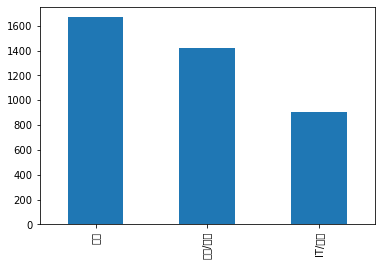

In [4]:
import requests
import pandas as pd
import os
from konlpy.tag import Mecab
import warnings
warnings.filterwarnings('ignore')


csv_path = os.getenv("HOME") + "/aiffel/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']
print(df.isnull().sum())

#중복된 샘플을 제거하기 
df.drop_duplicates(subset=['news'], inplace=True)

#데이터 탐색하기 
df['code'].value_counts().plot(kind = 'bar')
#뉴스기사 실제 개수를 확인하기 
print(df.groupby('code').size().reset_index(name = 'count'))

#tokenization 자연어처리에서 특정단위를 토큰이라고 하고 전처리과정을 형태소분석기를
#해야한다/// 토큰화라는건 자연어를 토큰단위로 자르는 것 
tokenizer = Mecab() #mecab()을 사용한다. 

#크게 중요하지는 않지만 불용어를 제거하기 
# https://wikidocs.net/21698 이 링크 참고하면 좋을듯 
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']
def preprocessing(data): # 불용어는 한번만 하는게 아니라 토큰화과정을 거쳐서 지속적으로 사용함
    text_data = []

    for sentence in data:
        temp_data = []
        #- 토큰화
        temp_data = tokenizer.morphs(sentence) 
        #- 불용어 제거
        temp_data = [word for word in temp_data if not word in stopwords] 
        text_data.append(temp_data)

    text_data = list(map(' '.join, text_data))

    return text_data
text_data = preprocessing(df['news'])

In [5]:
from sklearn.model_selection import train_test_split #트레인 데이터 분류하기 20%
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
# 왜 기사의 단어의 수를 카운트하며 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
#단어의 문서 연관성을 수치로 표시 
#https://www.youtube.com/watch?time_continue=21&v=meEchvkdB1U&feature=emb_logo
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
              precision    recall  f1-score   support

       IT/과학       0.90      0.74      0.81       236
          사회       0.79      0.91      0.85       422
       생활/문화       0.81      0.76      0.79       341

    accuracy                           0.82       999
   macro avg       0.83      0.80      0.81       999
weighted avg       0.82      0.82      0.82       999



news    0
code    0
dtype: int64
뉴스 기사의 개수:  3994
    code  count
0  IT/과학    903
1     사회   1668
2  생활/문화   1423


java.lang.InterruptedException: java.lang.InterruptedException: sleep interrupted

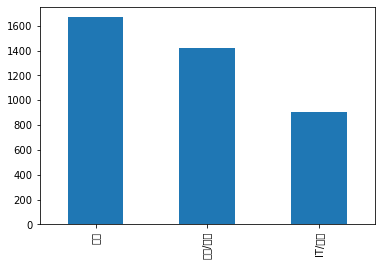

In [6]:
import requests
import pandas as pd
import os
from konlpy.tag import Kkma


csv_path = os.getenv("HOME") + "/aiffel/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']
print(df.isnull().sum())

#중복된 샘플을 제거하기 
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

#데이터 탐색하기 
df['code'].value_counts().plot(kind = 'bar')
#뉴스기사 실제 개수를 확인하기 
print(df.groupby('code').size().reset_index(name = 'count'))

#tokenization 자연어처리에서 특정단위를 토큰이라고 하고 전처리과정을 형태소분석기를
#해야한다/// 토큰화라는건 자연어를 토큰단위로 자르는 것 
tokenizer = Kkma() #m변경

#크게 중요하지는 않지만 불용어를 제거하기 
# https://wikidocs.net/21698 이 링크 참고하면 좋을듯 
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']
def preprocessing(data): # 불용어는 한번만 하는게 아니라 토큰화과정을 거쳐서 지속적으로 사용함
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data
text_data = preprocessing(df['news'])


In [ ]:
from sklearn.model_selection import train_test_split #트레인 데이터 분류하기 20%
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
# 왜 기사의 단어의 수를 카운트하며 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
#단어의 문서 연관성을 수치로 표시 
#https://www.youtube.com/watch?time_continue=21&v=meEchvkdB1U&feature=emb_logo
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
import requests
import pandas as pd
import os
from konlpy.tag import nouns


csv_path = os.getenv("HOME") + "/aiffel/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']
print(df.isnull().sum())

#중복된 샘플을 제거하기 
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

#데이터 탐색하기 
df['code'].value_counts().plot(kind = 'bar')
#뉴스기사 실제 개수를 확인하기 
print(df.groupby('code').size().reset_index(name = 'count'))

#tokenization 자연어처리에서 특정단위를 토큰이라고 하고 전처리과정을 형태소분석기를
#해야한다/// 토큰화라는건 자연어를 토큰단위로 자르는 것 
tokenizer = nouns() #변경

#크게 중요하지는 않지만 불용어를 제거하기 
# https://wikidocs.net/21698 이 링크 참고하면 좋을듯 
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']
def preprocessing(data): # 불용어는 한번만 하는게 아니라 토큰화과정을 거쳐서 지속적으로 사용함
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data
text_data = preprocessing(df['news'])


In [ ]:
from sklearn.model_selection import train_test_split #트레인 데이터 분류하기 20%
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
# 왜 기사의 단어의 수를 카운트하며 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
#단어의 문서 연관성을 수치로 표시 
#https://www.youtube.com/watch?time_continue=21&v=meEchvkdB1U&feature=emb_logo
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
  data_tfidf = tfidf_transformer.transform(data_counts)
  return data_tfidf

y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))